# Comparación: Muestreo Aleatorio Simple vs Estratificado
Este notebook compara los efectos en la estimación de la media poblacional de ingreso utilizando:
- Muestreo Aleatorio Simple (MAS)
- Muestreo Estratificado Proporcional

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

## Cargar población simulada

In [2]:
poblacion = pd.read_csv('poblacion_ingresos.csv')
poblacion.head()

,estrato,ingreso
0,Rural,1330.818427
1,Urbano,1246.306671
2,Urbano,1773.438183
3,Urbano,1087.650936
4,Rural,1290.043987


## Media real de la población

In [3]:
media_real = poblacion['ingreso'].mean()
print(f"Media real de la población: {media_real:.2f}")

Media real de la población: 1299.77


## Muestreo Aleatorio Simple (MAS)

In [4]:
mas_muestra = poblacion.sample(n=100, random_state=42)
mas_media = mas_muestra['ingreso'].mean()
mas_std = mas_muestra['ingreso'].std(ddof=1)
print(f"Media estimada (MAS): {mas_media:.2f}")
print(f"Desviación estándar (MAS): {mas_std:.2f}")

Media estimada (MAS): 1256.10
Desviación estándar (MAS): 393.62


## Muestreo Estratificado Proporcional

In [5]:
n_urbano = int(100 * 0.6)
n_rural = 100 - n_urbano
estrato_urbano = poblacion[poblacion['estrato'] == 'Urbano'].sample(n=n_urbano, random_state=42)
estrato_rural = poblacion[poblacion['estrato'] == 'Rural'].sample(n=n_rural, random_state=42)
estrat_muestra = pd.concat([estrato_urbano, estrato_rural])
estrat_media = estrat_muestra['ingreso'].mean()
estrat_std = estrat_muestra['ingreso'].std(ddof=1)
print(f"Media estimada (estratificado): {estrat_media:.2f}")
print(f"Desviación estándar (estratificado): {estrat_std:.2f}")

Media estimada (estratificado): 1280.75
Desviación estándar (estratificado): 342.67


## Comparación gráfica

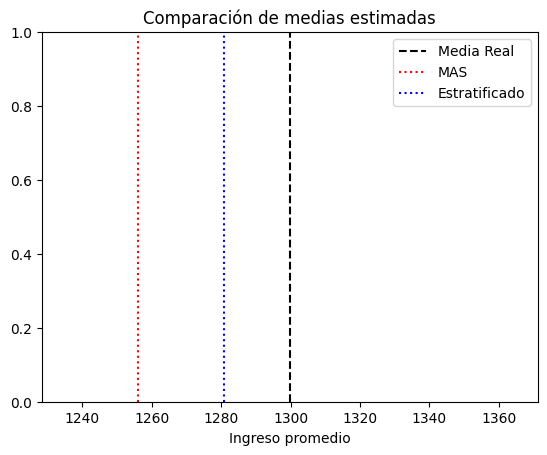

In [6]:
plt.axvline(media_real, color='black', linestyle='--', label='Media Real')
plt.axvline(mas_media, color='red', linestyle=':', label='MAS')
plt.axvline(estrat_media, color='blue', linestyle=':', label='Estratificado')
plt.legend()
plt.title('Comparación de medias estimadas')
plt.xlabel('Ingreso promedio')
plt.show()